In [1]:
import pickle
from pathlib import Path
import json
import numpy as np
from fedot.api.main import Fedot
from fedot.core.pipelines.adapters import PipelineAdapter

In [2]:
features = np.load(r"C:\Users\Konstantin\PycharmProjects\NIR\dataset\synthetic_dataset\features.npy")
target = np.load(r"C:\Users\Konstantin\PycharmProjects\NIR\dataset\synthetic_dataset\target.npy")

In [3]:
adapter = PipelineAdapter()

In [4]:
api = Fedot("classification", timeout=15)

In [5]:
fitted_pipeline = api.fit(features, target)

2023-03-29 00:35:10,287 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 79.6 MiB, max: 138.6 MiB
2023-03-29 00:35:10,291 - ApiComposer - Initial pipeline was fitted in 4.8 sec.
2023-03-29 00:35:10,292 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-03-29 00:35:10,299 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 15 min. Set of candidate models: ['knn', 'dt', 'scaling', 'qda', 'resample', 'fast_ica', 'pca', 'normalization', 'logit', 'lgbm', 'isolation_forest_class', 'poly_features', 'mlp', 'bernb', 'rf', 'knn', 'dt', 'scaling', 'qda', 'resample', 'fast_ica', 'pca', 'normalization', 'logit', 'lgbm', 'isolation_forest_class', 'poly_features', 'mlp', 'bernb', 'rf'].
2023-03-29 00:35:10,305 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-03-29 00:35:20,445 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2023-03-29 00:37:34,163 - MultiprocessingDispatcher - 21 individuals out of 21 in previous population were evaluated successfully.
2023-03-29 00:39:10,615 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.
2023-03-29 00:39:40,289 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.
2023-03-29 00:40:36,604 - MultiprocessingDispatcher - 20 individuals out of 20 in previous population were evaluated successfully.
2023-03-29 00:41:42,859 - MultiprocessingDispatcher - 24 individuals out of 32 in previous population were evaluated successfully.
2023-03-29 00:42:58,325 - MultiprocessingDispatcher - 30 individuals out of 32 in previous population were evaluated successfully.
2023-03-29 00:44:21,896 - MultiprocessingDispatcher - 46 individuals out of 54 in pre

Generations:   0%|          | 1/10000 [09:11<?, ?gen/s]

2023-03-29 00:44:21,974 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


2023-03-29 00:45:20,415 - SimultaneousTuner - Initial graph: {'depth': 2, 'length': 2, 'nodes': [mlp, isolation_forest_class]}
mlp - {}
isolation_forest_class - {} 
Initial metric: 0.946
  0%|          | 4/100000 [04:12<1756:03:49, 63.22s/trial, best loss: -0.9467028]         
2023-03-29 00:50:35,488 - SimultaneousTuner - Final graph: {'depth': 2, 'length': 2, 'nodes': [mlp, isolation_forest_class]}
mlp - {}
isolation_forest_class - {'bootstrap': True, 'max_features': 0.4702551358822476, 'max_samples': 0.4087849771319513}
2023-03-29 00:50:35,489 - SimultaneousTuner - Final metric: 0.947
2023-03-29 00:50:35,492 - ApiComposer - Hyperparameters tuning finished
2023-03-29 00:50:36,126 - ApiComposer - Model generation finished
2023-03-29 00:50:51,467 - FEDOT logger - Final pipeline was fitted
2023-03-29 00:50:51,469 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [mlp, isolation_forest_class]}
mlp - {}
isolation_forest_class - {'bootstrap': True, 'max_features': 0.470255

In [6]:
best_models = api.best_models
history = api.history

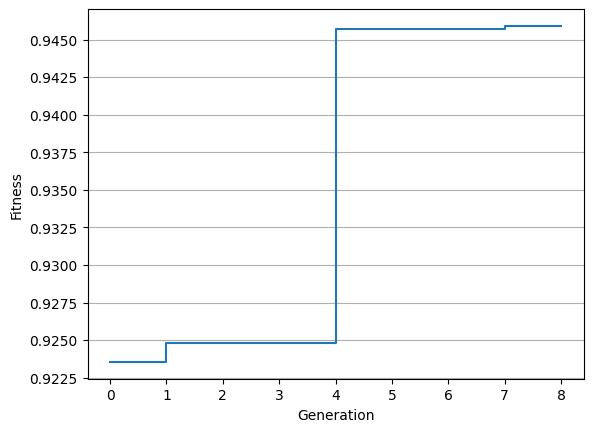

In [7]:
history.show()

In [8]:
with open("./best_models.pickle", "wb") as f:
    pickle.dump(best_models, f)

with open("./history.pickle", "wb") as f:
    pickle.dump(history, f)

with open("./api.pickle", "wb") as f:
    pickle.dump(api, f)

In [10]:
with open(r"C:\Users\Konstantin\PycharmProjects\NIR\notebooks\history.pickle", "rb") as f:
    history = pickle.load(f)

for i, generation in enumerate(history.individuals):
    for j, individual in enumerate(generation.data):
        graph = individual.graph
        fitness = individual.fitness
        pipeline = adapter.restore(graph)
        pipeline.save(f"./ranking_data/pipelines/{i}_{j}", create_subdir=False)
        with open(f"./ranking_data/metrics/{i}_{j}.pickle", "wb") as f:
            pickle.dump({"fitness": fitness.value, "filler": 1.}, f)  # Filler is required since dataset's MinMaxScaler expects 2 values